<a href="https://colab.research.google.com/github/mimohiminul/Rock_vs_Mine_Prediction_System-CSE299/blob/main/Rock_VS_Mine_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Data Collection and Data Processing

In [ ]:
# Load the dataset
import pandas as pd
sonar_data = pd.read_csv('/content/Sonar Data.csv', header=None)

In [ ]:
# Display first 5 rows
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Dataset Information

In [ ]:
# Number of rows and columns
print("Shape of dataset:", sonar_data.shape)

Shape of dataset: (208, 61)


In [ ]:
# Statistical measures
print("\nStatistical summary:")
print(sonar_data.describe())



Statistical summary:
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085

In [ ]:
# Count of Rock (R) and Mine (M)
print("\nLabel counts:")
print(sonar_data[60].value_counts())


Label counts:
60
M    111
R     97
Name: count, dtype: int64


In [ ]:
# Mean values for each class
print("\nMean values by class:")
print(sonar_data.groupby(60).mean())


Mean values by class:
          0         1         2         3         4         5         6   \
60                                                                         
M   0.034989  0.045544  0.050720  0.064768  0.086715  0.111864  0.128359   
R   0.022498  0.030303  0.035951  0.041447  0.062028  0.096224  0.114180   

          7         8         9   ...        50        51        52        53  \
60                                ...                                           
M   0.149832  0.213492  0.251022  ...  0.019352  0.016014  0.011643  0.012185   
R   0.117596  0.137392  0.159325  ...  0.012311  0.010453  0.009640  0.009518   

          54        55        56        57        58        59  
60                                                              
M   0.009923  0.008914  0.007825  0.009060  0.008695  0.006930  
R   0.008567  0.007430  0.007814  0.006677  0.007078  0.006024  

[2 rows x 60 columns]


Separating Features and Labels

In [ ]:
X = sonar_data.drop(columns=60, axis=1)   # features
Y = sonar_data[60]                        # labels

In [ ]:
print("Features shape:", X.shape)
print("Labels shape:", Y.shape)

Features shape: (208, 60)
Labels shape: (208,)


Splitting Data into Training and Testing Sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, stratify=Y, random_state=1
)



In [ ]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (187, 60)
Test set shape: (21, 60)


Logistic Regression Model


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Training accuracy
train_acc_log = accuracy_score(log_model.predict(X_train), Y_train)

In [ ]:
# Test accuracy
test_acc_log = accuracy_score(log_model.predict(X_test), Y_test)


In [ ]:
print(" Logistic Regression")
print("Training Accuracy:", train_acc_log)
print("Test Accuracy:", test_acc_log)

 Logistic Regression
Training Accuracy: 0.8342245989304813
Test Accuracy: 0.7619047619047619


Support Vector Machine (SVM) Model

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Training accuracy
train_acc_svm = accuracy_score(svm_model.predict(X_train), Y_train)


In [ ]:
# Test accuracy
test_acc_svm = accuracy_score(svm_model.predict(X_test), Y_test)


In [ ]:
print(" Support Vector Machine")
print("Training Accuracy:", train_acc_svm)
print("Test Accuracy:", test_acc_svm)

 Support Vector Machine
Training Accuracy: 0.839572192513369
Test Accuracy: 0.7142857142857143


 K-Nearest Neighbors (KNN) Model

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)


KNeighborsClassifier()

In [ ]:
# Training accuracy
train_acc_knn = accuracy_score(knn_model.predict(X_train), Y_train)

In [ ]:
# Test accuracy
test_acc_knn = accuracy_score(knn_model.predict(X_test), Y_test)

In [ ]:
print(" K-Nearest Neighbors")
print("Training Accuracy:", train_acc_knn)
print("Test Accuracy:", test_acc_knn)

 K-Nearest Neighbors
Training Accuracy: 0.839572192513369
Test Accuracy: 0.8095238095238095


 Accuracy Comparison Table

In [ ]:
accuracy_data = {
    "Model": ["Logistic Regression", "SVM", "KNN"],
    "Training Accuracy": [train_acc_log, train_acc_svm, train_acc_knn],
    "Test Accuracy": [test_acc_log, test_acc_svm, test_acc_knn]
}

In [ ]:
accuracy_df = pd.DataFrame(accuracy_data)
print(accuracy_df)

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.834225       0.761905
1                  SVM           0.839572       0.714286
2                  KNN           0.839572       0.809524


Accuracy Comparison Chart

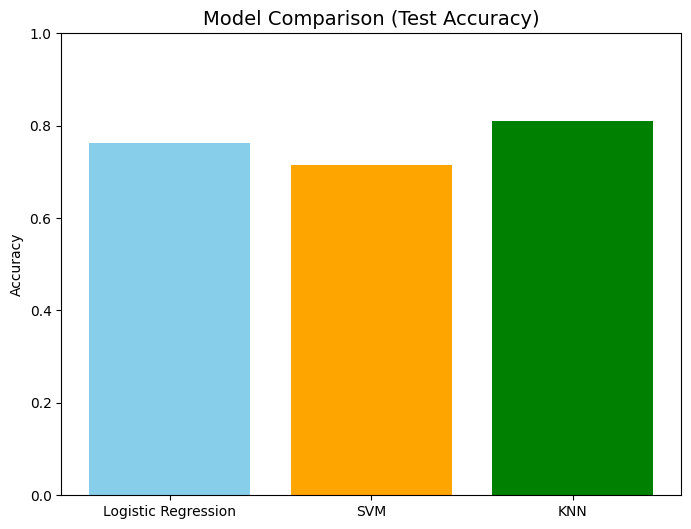

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(accuracy_df["Model"], accuracy_df["Test Accuracy"], color=['skyblue','orange','green'])
plt.title("Model Comparison (Test Accuracy)", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

Predictive System (User Input Example)


In [ ]:
# Example input (replace with real values from dataset)

input_data = (0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067)

In [ ]:
# Convert to numpy array

input_data_as_numpy = np.asarray(input_data).reshape(1,-1)

In [ ]:
# Predictions from all models

pred_log = log_model.predict(input_data_as_numpy)[0]
pred_svm = svm_model.predict(input_data_as_numpy)[0]
pred_knn = knn_model.predict(input_data_as_numpy)[0]


In [ ]:
print("Prediction (Logistic Regression):", "Rock" if pred_log=='R' else "Mine")
print("Prediction (SVM):", "Rock" if pred_svm=='R' else "Mine")
print("Prediction (KNN):", "Rock" if pred_knn=='R' else "Mine")

Prediction (Logistic Regression): Mine
Prediction (SVM): Mine
Prediction (KNN): Mine
